### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
df = pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Replacing "Graduate" as 1 and "Not Graduate" as 0.

In [5]:
df['Education'] = df['Education'].replace('Graduate', 1)
df['Education'] = df['Education'].replace('Not Graduate', 0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,614.0,0.781759,0.413389,0.0,1.0,1.0,1.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [8]:
cat_column = df.columns
cat_column

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Dropping Nan Values from the Dataset

In [10]:
df = df.dropna()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,1,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,1,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,1,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,1,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,1,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
df['Loan_ID'].nunique()

480

## Exploratory Data Analysis:

In [13]:
for column in cat_column:
  print(df[column].value_counts())
  print('#' * 40)

LP001003    1
LP001005    1
LP002347    1
LP002345    1
LP002342    1
           ..
LP001674    1
LP001673    1
LP001666    1
LP001665    1
LP002990    1
Name: Loan_ID, Length: 480, dtype: int64
########################################
Male      394
Female     86
Name: Gender, dtype: int64
########################################
Yes    311
No     169
Name: Married, dtype: int64
########################################
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64
########################################
1    383
0     97
Name: Education, dtype: int64
########################################
No     414
Yes     66
Name: Self_Employed, dtype: int64
########################################
2500    7
4583    6
2600    5
6000    4
4166    4
       ..
3418    1
3975    1
3244    1
4408    1
7583    1
Name: ApplicantIncome, Length: 405, dtype: int64
########################################
0.0       216
1666.0      5
2500.0      4
5625.0      3
2083.0      3
         

## Data Visualization

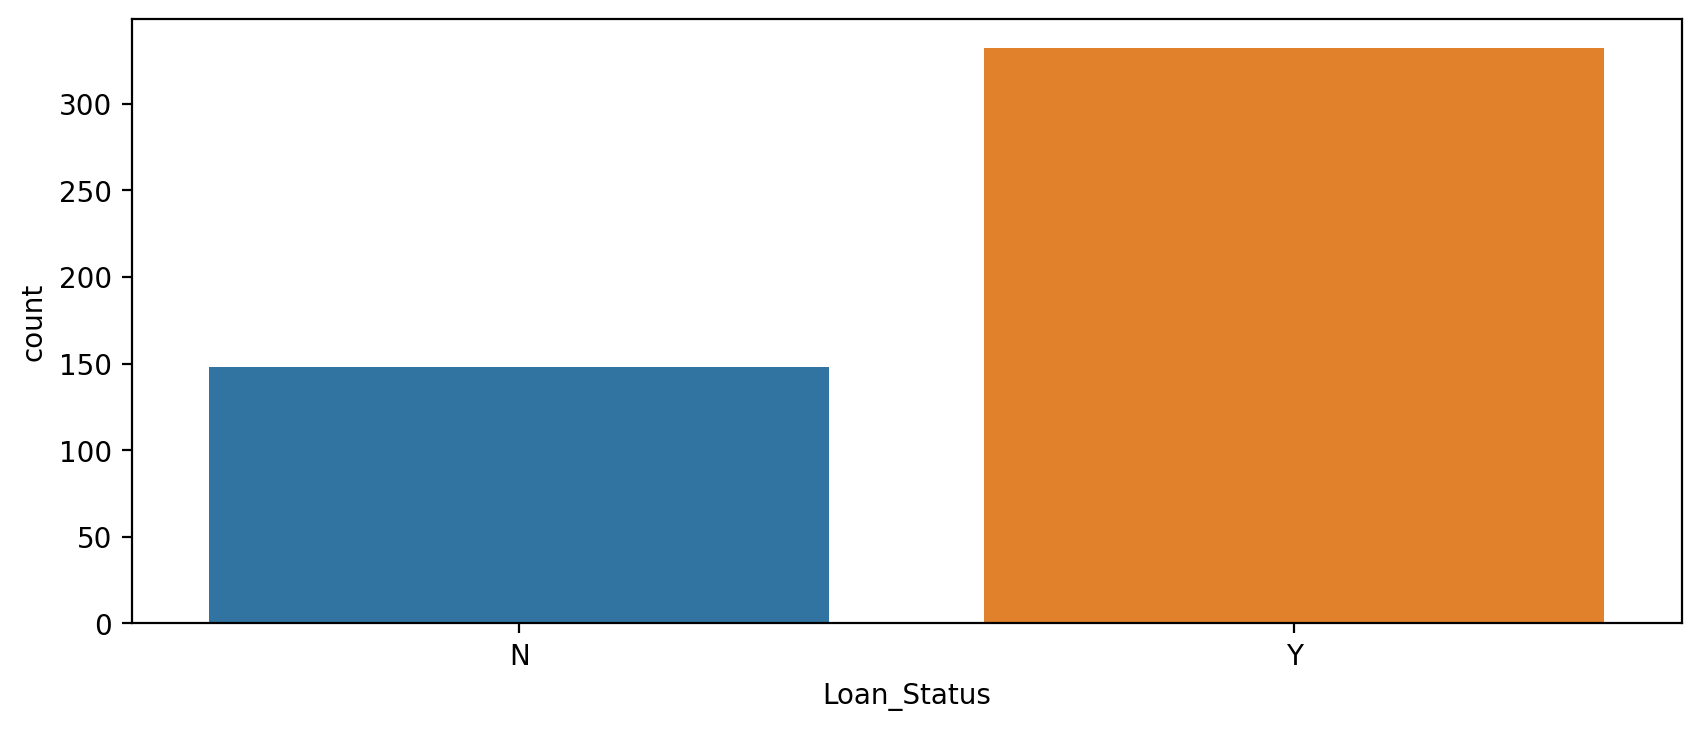

In [14]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='Loan_Status',data=df)

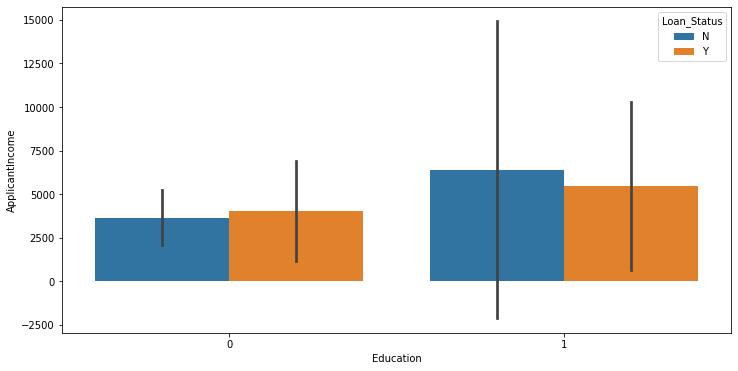

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x='Education',y='ApplicantIncome',data=df,estimator=np.mean,ci='sd',hue='Loan_Status')

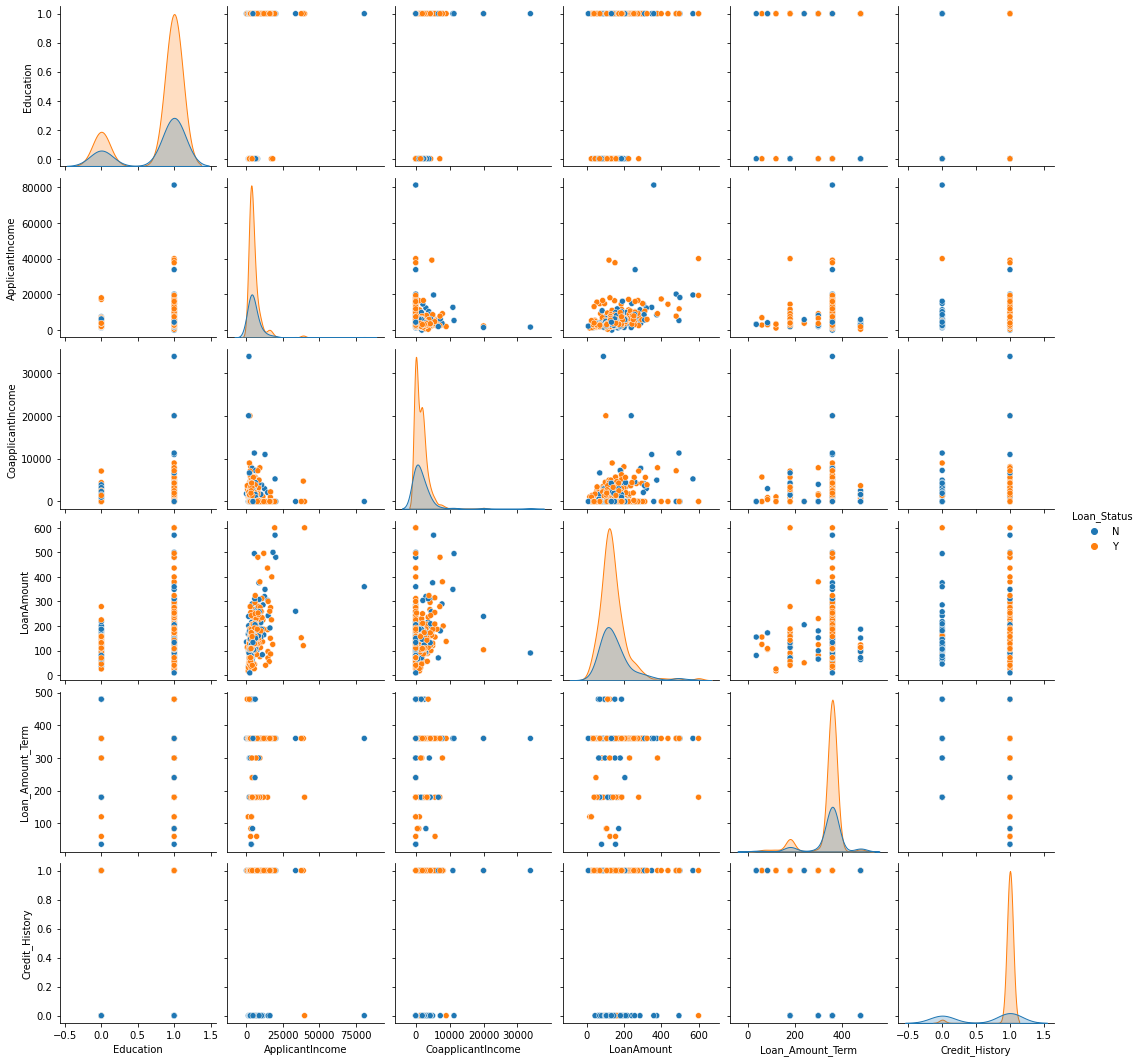

In [16]:
sns.pairplot(df, hue='Loan_Status')

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,1,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


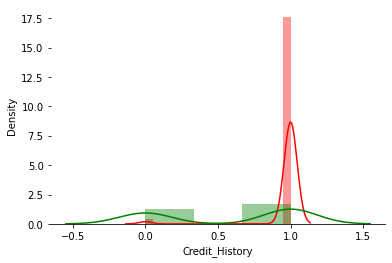

In [19]:
sns.distplot(df[df['Loan_Status'] == 'Y']['Credit_History'], color = 'r')
sns.distplot(df[df['Loan_Status'] == 'N']['Credit_History'], color = 'g')
sns.despine(top=True, right=True, left = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


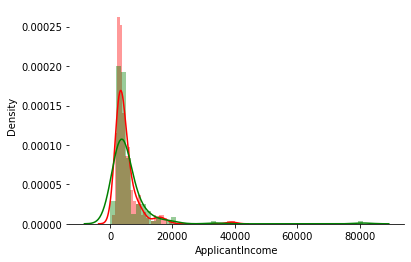

In [23]:
sns.distplot(df[df['Loan_Status'] == 'Y']['ApplicantIncome'], color = 'r')
sns.distplot(df[df['Loan_Status'] == 'N']['ApplicantIncome'], color = 'g')
sns.despine(top=True, right=True, left = True)

In [29]:
def plot_graph(x):
  tab = pd.crosstab(x, df['Loan_Status'], margins=True)
  print(tab)
  print('-'* 100)

  tab1 = pd.crosstab(x, df['Loan_Status'], normalize='index')
  tab1.plot(kind='bar', stacked=True, figsize=(7, 4))
  plt.xticks(rotation=360)
  labels=['No', 'Yes']
  plt.legend(loc='lower left', frameon=False)
  plt.legend(loc='upper left', frameon=False)
  sns.despine(top=True, left=True, right=True)
  plt.show()

Loan_Status    N    Y  All
Loan_ID                   
LP001003       1    0    1
LP001005       0    1    1
LP001006       0    1    1
LP001008       0    1    1
LP001011       0    1    1
...          ...  ...  ...
LP002979       0    1    1
LP002983       0    1    1
LP002984       0    1    1
LP002990       1    0    1
All          148  332  480

[481 rows x 3 columns]
----------------------------------------------------------------------------------------------------


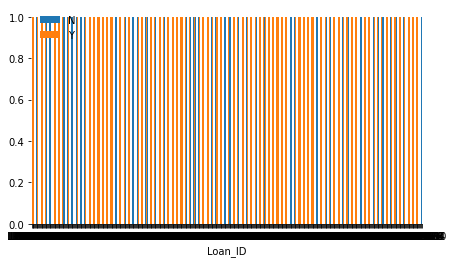

Loan_Status    N    Y  All
Gender                    
Female        32   54   86
Male         116  278  394
All          148  332  480
----------------------------------------------------------------------------------------------------


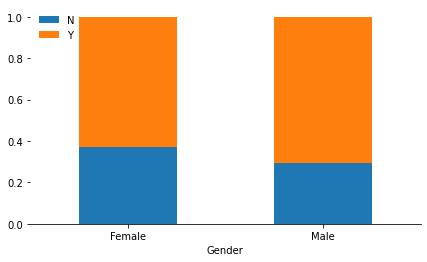

Loan_Status    N    Y  All
Married                   
No            64  105  169
Yes           84  227  311
All          148  332  480
----------------------------------------------------------------------------------------------------


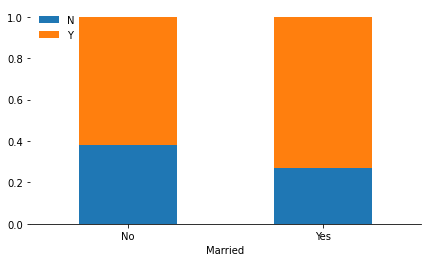

Loan_Status    N    Y  All
Dependents                
0             87  187  274
1             28   52   80
2             20   65   85
3+            13   28   41
All          148  332  480
----------------------------------------------------------------------------------------------------


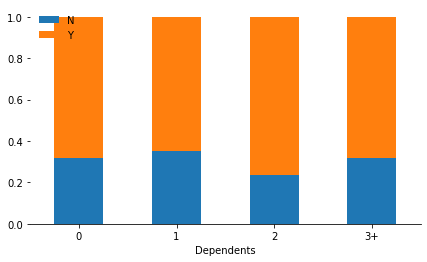

Loan_Status    N    Y  All
Education                 
0             36   61   97
1            112  271  383
All          148  332  480
----------------------------------------------------------------------------------------------------


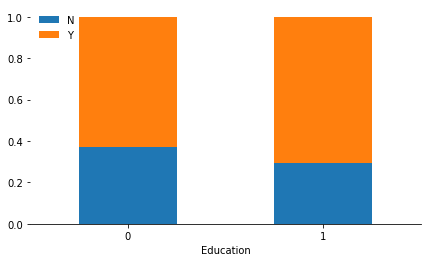

Loan_Status      N    Y  All
Self_Employed               
No             125  289  414
Yes             23   43   66
All            148  332  480
----------------------------------------------------------------------------------------------------


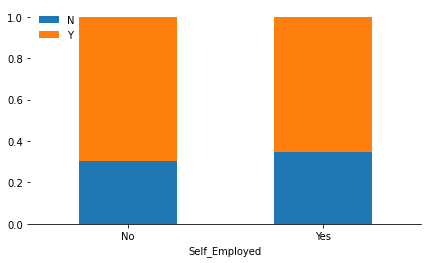

Loan_Status        N    Y  All
ApplicantIncome               
150                1    0    1
645                0    1    1
1000               1    0    1
1025               0    1    1
1299               0    1    1
...              ...  ...  ...
37719              0    1    1
39147              0    1    1
39999              0    1    1
81000              1    0    1
All              148  332  480

[406 rows x 3 columns]
----------------------------------------------------------------------------------------------------


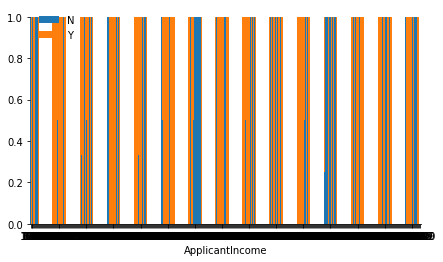

Loan_Status          N    Y  All
CoapplicantIncome               
0.0                 75  141  216
16.12000084          0    1    1
189.0                0    1    1
240.0                0    1    1
242.0                0    1    1
...                ...  ...  ...
10968.0              1    0    1
11300.0              1    0    1
20000.0              1    1    2
33837.0              1    0    1
All                148  332  480

[233 rows x 3 columns]
----------------------------------------------------------------------------------------------------


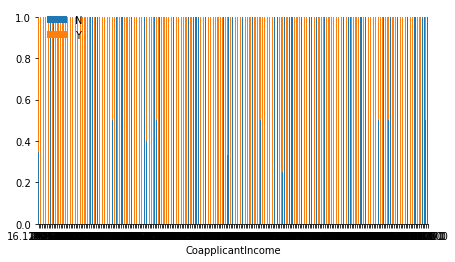

Loan_Status    N    Y  All
LoanAmount                
9.0            1    0    1
17.0           0    1    1
25.0           0    2    2
26.0           0    1    1
30.0           0    2    2
...          ...  ...  ...
496.0          0    1    1
500.0          1    0    1
570.0          1    0    1
600.0          0    2    2
All          148  332  480

[187 rows x 3 columns]
----------------------------------------------------------------------------------------------------


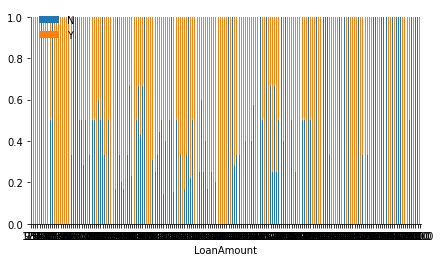

Loan_Status         N    Y  All
Loan_Amount_Term               
36.0                2    0    2
60.0                0    2    2
84.0                1    2    3
120.0               0    3    3
180.0              12   24   36
240.0               1    1    2
300.0               5    4    9
360.0             119  292  411
480.0               8    4   12
All               148  332  480
----------------------------------------------------------------------------------------------------


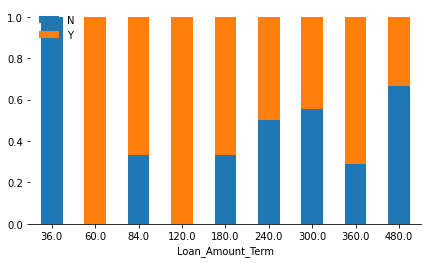

Loan_Status       N    Y  All
Credit_History               
0.0              63    7   70
1.0              85  325  410
All             148  332  480
----------------------------------------------------------------------------------------------------


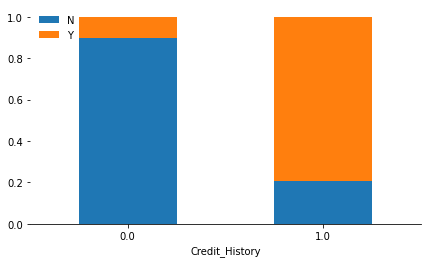

Loan_Status      N    Y  All
Property_Area               
Rural           54   85  139
Semiurban       42  149  191
Urban           52   98  150
All            148  332  480
----------------------------------------------------------------------------------------------------


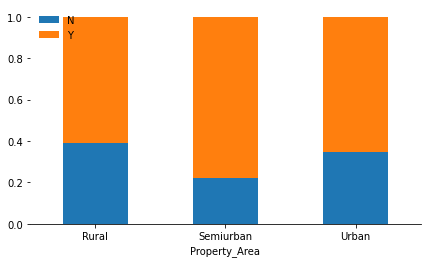

Loan_Status    N    Y  All
Loan_Status               
N            148    0  148
Y              0  332  332
All          148  332  480
----------------------------------------------------------------------------------------------------


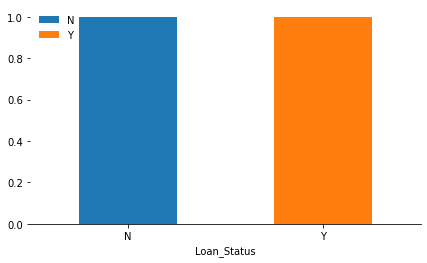

In [30]:
for x in cat_column:
  plot_graph(df[x])

### After Perfoming EDA:

We understand that:


*   People with 0 Dependents have taken the most Loans.
*   Graduates have taken more loans than Non-Graduates.
*   Employed people have taken more loans than Self-Employed people.
*   Single earners in the family have opted for more loans.
* People with Credit History have opted for the most number of Loans.
* Semi Urban people have taken the most loans.






Thus,

*   Education
*   Applicant Income
* Co-Applicant Income
* Loan Amount
* Loan Amount Term
* Credit History

Are the most important Factors in this Analysis.



In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,1,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


### Preparing Data for Logistic Regression

In [33]:
df['Loan_Amount_Term'].unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [35]:
df = df.drop(columns=['Loan_ID', 'Gender', 'Married', 'Self_Employed', 'Property_Area'])

In [40]:
X = df.drop(['Loan_Status', 'Dependents'], axis=1)
y = df['Loan_Status']

Splitting Data into Training and Testing Sets.

Using 80% Data to train and 20% Data to Test.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

## Applying Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [43]:
yhat = LR.predict(X_test)
yhat

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [44]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.20202499, 0.79797501],
       [0.27589142, 0.72410858],
       [0.26408827, 0.73591173],
       [0.36096004, 0.63903996],
       [0.30592702, 0.69407298],
       [0.26310214, 0.73689786],
       [0.27005741, 0.72994259],
       [0.29137873, 0.70862127],
       [0.26686021, 0.73313979],
       [0.25382322, 0.74617678],
       [0.41338064, 0.58661936],
       [0.27258041, 0.72741959],
       [0.29750656, 0.70249344],
       [0.26803065, 0.73196935],
       [0.3875031 , 0.6124969 ],
       [0.26835955, 0.73164045],
       [0.25333712, 0.74666288],
       [0.27256846, 0.72743154],
       [0.30236616, 0.69763384],
       [0.28699479, 0.71300521],
       [0.45576799, 0.54423201],
       [0.29776772, 0.70223228],
       [0.34618979, 0.65381021],
       [0.32192025, 0.67807975],
       [0.32003285, 0.67996715],
       [0.24734939, 0.75265061],
       [0.38800453, 0.61199547],
       [0.36024871, 0.63975129],
       [0.34847859, 0.65152141],
       [0.29134803, 0.70865197],
       [0.

### Jaccard Index Score:

In [48]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label='Y')


0.6526315789473685

### Log Loss Score:

In [56]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6416239859803196

## Final Classification Report based on Logistic Regression Analysis:

In [55]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           N       0.50      0.03      0.06        33
           Y       0.66      0.98      0.79        63

    accuracy                           0.66        96
   macro avg       0.58      0.51      0.42        96
weighted avg       0.60      0.66      0.54        96



###Thus, the above Machine Learning Model has Accuracy ***0.66*** and F1 Score ***0.79*** 